# Introduction to Python

In the following introduction, we give a short overview of Python as a scripting language and it's use for Scientific Computing codes. Also, this notebook may serve as a quick reference throughout the course. 

In the textfields you will find short Python scripts. You can run them by clicking on them and pressing Shift+Enter, what will result in the corresponding output. Short excercises are included with the aim of reinforcing and illustrating concepts that are used in the labs. However, you do not need to submit solutions for this session.

We use some examples from the complete Python Introduction book by Hans Petter Langtangen, available at:  
https://hplgit.github.io/primer.html/doc/pub/half/book.pdf

It's a good idea to check it!

Let us begin with an example that models the kinematics of a ball in free fall:

In [1]:
v0 = 5
g = 9.81
t = 0.6
y = v0*t - 0.5*g*t**2
print ('At t=',t,' s, the height of the ball is ',y,' m.')

At t= 0.6  s, the height of the ball is  1.2342  m.


We have declared the variables v0 as initial speed, g as the gravitational constant and t as time. Then the displacement y corresponding to t seconds of free fall is computed. The computed position is printed in screen by using the function print. Objects that are enclosed by ' or " are denoted strings and are basically text. The example above shows a simple way of outputting text by using print.

In this course we use specific mathematical operations, for intance, in the script $*$ denotes product and t$**$2 means $t^2$. We also use functions calls as we demonstrate later on. There exist several python libraries that provide us with definitions of functions and other basic routines, but often these packages have different purposes. Hence, it becomes important to know what package is being used. For us NumPy (Numerical Python) will provide us with the basics.

If we are interested in the time spent during the free fall we need to use square roots. For this we import numpy and use sqrt:

In [2]:
v0 = 5
g = 9.81
yc = 0.2
import numpy
t1 = (v0 - numpy.sqrt(v0**2 - 2*g*yc))/g
t2 = (v0 + numpy.sqrt(v0**2 - 2*g*yc))/g
print('At t=',t1,'s and ,',t2,'s, the height is ',yc,'m.') 

At t= 0.0417063724983 s and , 0.977661619347 s, the height is  0.2 m.


We see that we are required to type numpy on every function call. This is a good idea because several different packages contain similar function calls but with different functionality. Then typing the package give us control on what we do. However, we can lessen the typing burden by relabelling numpy by just "np". Let's compute:

In [3]:
import numpy as np
# np is now the name of the mathematical module
f1 = np.sin(np.pi)
from numpy import log as ln
f2 = ln(5)
# now we redefine known functions with shorter labels.
# Notice that we don't call numpy nor np in the f3 call
from numpy import sin as s, cos as c, log as ln
x = np.pi/2
f3 = s(x)*c(x) + ln(x)
print ('f1=',f1,', f2=',f2,', f3=',f3)

f1= 1.22464679915e-16 , f2= 1.60943791243 , f3= 0.451582705289


Other special functions are also available. Are the following values equivalent?

In [4]:
x = 2*np.pi
r1 = np.sinh(x)
r2 = 0.5*(np.exp(x) - np.exp(-x))
r3 = 0.5*(np.e**x - np.e**(-x))
print ("r1=",r1,", r2=",r2,", r3=",r3)

r1= 267.744894041 , r2= 267.744894041 , r3= 267.7448940410163


We can also compute in complex arithmetics by using the imaginary unit 1j or adding "j" to a number to specify it's imaginary part. Lets check Euler's greatest formula:

In [6]:
q = 8     					# some arbitrary number
z1=np.exp(1j*q) 			# exponential representation
z2=np.cos(q) + 1j*np.sin(q)  # trigonometric representation
print ("z1=",z1,", z2=",z2,", z1-z2=",(z1-z2))

z1= (-0.145500033809+0.989358246623j) , z2= (-0.145500033809+0.989358246623j) , z1-z2= 0j


In this course we deal with a special class of functions denoted piecewise. Let's see an example:

In [7]:
def f(x):
	if 0 <= x <= 1:
		value = x*(1-x)
	else:
		value = 0
	return value

print('f(0.5)=',f(0.5),', f(4)=',f(4))

f(0.5)= 0.25 , f(4)= 0


In the last example we have defined $f(x)$ to be later used in the print statement.
### Excercise: 
- Explain the output. Particularly, we see that $f(4)=0$, does this mean that $4$ is a root of $x(1-x)$?

## Loops

A very valuable tool in scientific computations are loops. Let's see how it works:

In [8]:
n = 3
for i in range(-1, n):
	print (i)

-1
0
1
2


We observe then that here range(-1,n) represents the values i=-1,1,...,n-1. Similarly, we can work with nested loops. Guess the output:

In [9]:
for i in range(1, n+1):
	for j in range(i):
		print (i, j)

1 0
2 0
2 1
3 0
3 1
3 2


Observe that in python idexes start from zero, the statement "j in range(i)" gives j=0,...,i-1. This is an important difference from other script languages where indexes start at unity and end one position after: j=1,...,i. Keep this in mind when writing your scripts.

We can exclude some values on the last loop by adding a conditional statement. Try to guess the output:

In [10]:
for i in range(1, n+1):
    for j in range(i):
        if i != 2:
            print (i, j)

1 0
3 0
3 1
3 2


Notice that the the values corresponding to i=2 have been ommitted. The clause i != 2, reads "i not equals 2". What values are excluded in the following example?

In [13]:
for i in range(1, n+1):
    for j in range(i):
        if j:
            print (i, j)
    if i==2:
        print("Hellow world!")

2 1
Hellow world!
3 1
3 2


The statement "if j" becomes true for any $j>0$, hence we exclude $j=0$. We can also write "j!=0" alternatively.
### Exercise: 
- Print the message: "Hello World!" when $i$ is 2.

Loops are typically used in approximation series. Consider the script for the approximation series of $sin(x)$ given by:

In [16]:
import math as mt # importing factorial
x = 1.2  # assign some value
N = 5   # maximum power in sum
k = 1
s = x
sign = 1.0

while k < N:
	sign = - sign
	k = k + 2
	term = sign*x**k/mt.factorial(k)
	s = s + term

print ('sin(',x,') = ',np.sin(x),', series (',x,')=',s,' (approx with ',N,' terms)')

sin( 1.2 ) =  0.932039085967 , series ( 1.2 )= 0.9327359999999999  (approx with  5  terms)


### Excercise:
- Use the script above to evaluate $\pi\approx 4\sum_{k=1}^N \frac{(-1)^{k+1}}{2k-1}$, by increasing $N$ and paying attention to the convergence towards $\pi$.
- Find $N$ such that we obtain an error less than $10^{-2}$.

We also use loops for numerical computations in general. The next example illustrates numerical integration:

In [17]:
import numpy as pn
# numerical integration example
def Simpson(f, a, b, n=500):
	h = (b - a)/float(n)
	sum1 = 0
	for i in range(1, int(n/2) + 1):
		sum1 += f(a + (2*i-1)*h)
	
	sum2 = 0
	for i in range(1, int(n/2)):
		sum2 += f(a + 2*i*h)
	
	integral = (b-a)/(3*n)*(f(a) + f(b) + 4*sum1 + 2*sum2)
	return integral
def h(x):
	return (3./2)*pn.sin(x)**3
print ('Integral f(x) from 0 to pi:')

def application():
    for N in 2, 6, 12, 100, 500:
        approx = Simpson(h, 0, pn.pi, N)
        print ('N=%3d, approx=%18.15f, error=%9.2E' % \
            (N, approx, 2-approx))
application ()

Integral f(x) from 0 to pi:
N=  2, approx= 3.141592653589793, error=-1.14E+00
N=  6, approx= 1.989171700583579, error= 1.08E-02
N= 12, approx= 1.999489233010781, error= 5.11E-04
N=100, approx= 1.999999902476350, error= 9.75E-08
N=500, approx= 1.999999999844138, error= 1.56E-10


Remarks:
- The statement float(n) ensures that the division by n gives a decimal number.
- Similarly, int(N/2) truncates the division giving the integer part.
- We break a long line in the code by using "\" symbol.
- We have used several function definitions and the excecution is resumed in application () call.
- Notice that the use of print here is slightly different than before. The current form allow us to control the formatting of the text in the classical C standard.

We can directly input a new definition of h(x) and still use Simpson(...), we denote this concept: inline functions or lambda functions. Take a close look to the following case:

In [21]:
N=5
approx = Simpson((lambda x: pn.exp(x)), 0, 1.0, N)
print ('N=%3d, approx=%18.15f' % (N, approx))

N=  5, approx= 1.258401163862953


### Excercise: 
- Verify the exact integration of the last example and find how many partitions ($N$) do we need for obtaining a residual smaller than $10^{-4}$.
- Verify the Gaussian integral $\sqrt{\pi}=\lim_{L\rightarrow \infty}2\int_{0}^L e^{-x^2} dx$, by modifying $N$ and using $L=10$. Notice that this is an improper integral.
- Find $N$ such that the residual for the Gaussian integral is smaller than $10^{-12}$.
- What integral converges faster (residual drops faster with $N$).

In [27]:
N=35
approx = Simpson((lambda x: 2*pn.exp(-x**2)), 0, 10.0, N)
print ('N=%3d, approx=%18.15f, error=%9.2E' % \
            (N, approx, (pn.sqrt(pn.pi)-approx)))

N= 35, approx= 1.772453850905428, error= 8.82E-14


# Arrays

Arrays are objects that store several elements in a compact way. Often arrays are used in computations as matrices and vectors. Consider the array "degrees" containing elements that denote temperature in Celcius. Then we output the conversion table:

In [28]:
degrees = np.array([-20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
print ('    C    F')
for C in degrees:
	F = (9.0/5)*C + 32
	print ('%5d %5.1f' % (C,F))
print ('The degrees list has', len(degrees), 'elements')

    C    F
  -20  -4.0
  -15   5.0
  -10  14.0
   -5  23.0
    0  32.0
    5  41.0
   10  50.0
   15  59.0
   20  68.0
   25  77.0
   30  86.0
   35  95.0
   40 104.0
The degrees list has 13 elements


We have defined the array degrees explicitly (we list each entry from creation), then we used a loop to operate each element of the array and get the respective conversion. Finally we access the array size by using: len(degrees).

We can access several elements of the array in compact notation. For this consider the following task.

### Excercise: 
- Experiment in the blank below the output of the following cases:
degrees[2:], degrees[1:3], degrees[:3], degrees[1:-1], degrees[6:-2] and describe your observations.

In [34]:
degrees[1:-1]

array([-15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35])

Basically, we can obtain sub arrays from performing direct index operations. This special feature allow us to omit looping over array elements and improves readibility of the code. The package numpy offers a great deal of functions that allow arrays as input argument. 

The next code illustrate vectorized operations:  

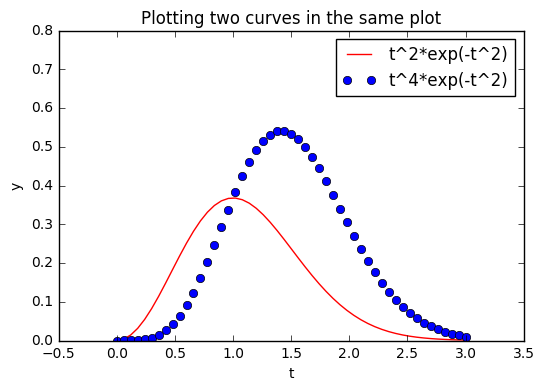

In [36]:
import numpy as np
from sympy.matrices import *
from matplotlib.pylab import *

N=51

def f1(t):
	return t**2*np.exp(-t**2)

def f2(t):
	return t**2*f1(t)

t = np.linspace(0, 3, N) # t is now an array/vector

y1 = zeros(len(t))
y2 = zeros(len(t))

y1 = f1(t) # we compute f1(t) for each element of t in a single call

for i in range(len(t)): # here we do it the classic way
	y2[i] = f2(t[i])

# Plotting
plot(t, y1, 'r-')
hold('on')
plot(t, y2, 'bo')

title('My First Matplotlib Demo')
xlabel('t')
ylabel('y')
legend(['t^2*exp(-t^2)', 't^4*exp(-t^2)'])
title('Plotting two curves in the same plot')

# fixing the output window
axis([-0.5, 3.5, 0.0, 0.8]) # [tmin, tmax, ymin, ymax]
show ()

### Excercise
- Repeat the two approximations for $\pi$ (series and integral) and store the error in vectors E1 and E2.
- Use the function semilogy and the vectors E1, E2 in order to plot the errors vs N. This strategy is useful for comparing convergence of different numerical methods. Basically we want to conclude what strategy performs better in terms of $N$. We will be studying convergence of several numerical methods applied to PDE's in the course.

Similarly we can define explicitly matrices and operate in the following way:

In [38]:
print('The 3x3 identity matrix: ')
print((np.eye(3)))
print('A single zero row: ')
print((np.ones(5)))
print('A column with zeros: ')
print(np.zeros((3,1))) # notice the double brakets
print('Zero rectangular matrix: ')
print(np.zeros((4,2))) # notice the double brakets
print('Specifiying a diagonal matrix: ')
print(np.diag((1,2,3,4)))
np.diag((1,2,3))

The 3x3 identity matrix: 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
A single zero row: 
[ 1.  1.  1.  1.  1.]
A column with zeros: 
[[ 0.]
 [ 0.]
 [ 0.]]
Zero rectangular matrix: 
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
Specifiying a diagonal matrix: 
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Common usefull operations are also available:

In [39]:
A=np.array([[1,1],[2,1]])
B=np.array([[0,1],[1,0]])
print('A transpose is: ')
print((A.T))
print('The sum is: ')
print((A+B))
print('Addition by scalar is: ')
print((A-1))
print('Product by scalar is: ')
print((2*B))
print('Matrix product is: ')
print((A.dot(B)))

A transpose is: 
[[1 2]
 [1 1]]
The sum is: 
[[1 2]
 [3 1]]
Addition by scalar is: 
[[0 0]
 [1 0]]
Product by scalar is: 
[[0 2]
 [2 0]]
Matrix product is: 
[[1 1]
 [1 2]]


### Exercise:
- Verify in paper the results of the matrix operations.

Particularly important matrix operations are inversion of a matrix and solution of linear systems. We verify the identity $A^{-1}A=I$

In [40]:
Ainv=np.linalg.inv(A)
print('We check the inverse:')
print((Ainv.dot(A)))

We check the inverse:
[[ 1.  0.]
 [ 0.  1.]]


For the last task we assemble a tridiagonal matrix $A$ and a load vector $b$ filled with random elements and find $x$ such that the corresponding system: $Ax=b$ is satisfied.

In [41]:
from scipy.sparse import spdiags
n=8;
d=np.ones(n); #
data = np.array([-d,2*d,-d])
diags = np.array([-1, 0, 1])
A=spdiags(data, diags, 8, 8).toarray()
print('A is a banded matrix:')
print(A)

b=np.random.rand(n,1)  # vector filled with random elements
x=np.linalg.solve(A,b) # solving the system Ax=b
print('The solution x is:')
print(x)

A is a banded matrix:
[[ 2. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.]]
The solution x is:
[[ 1.54102011]
 [ 3.05625484]
 [ 3.78459839]
 [ 4.11918251]
 [ 3.89061784]
 [ 3.19022059]
 [ 2.29383853]
 [ 1.29643798]]


In [42]:
print('The element A00=',A[0,0])
A[-1,-1]=1 # we modify the last element of A
print('The modified matrix is:\n',A)

The element A00= 2.0
The modified matrix is:
 [[ 2. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.]]


We can also use index notation to extract submatrices. However, the following example demostrates an important concept in programming languages: 
We can copy by reference and by value. For this let's extract a sub matrix from A:

In [43]:
sub=A[4:,4:] # we extract a sub matrix from A
print(sub)
sub[-1,-1]=10 # we modify sub
print('Lets check A:')
print(A)       # A has also been modified!

[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  1.]]
Lets check A:
[[  2.  -1.   0.   0.   0.   0.   0.   0.]
 [ -1.   2.  -1.   0.   0.   0.   0.   0.]
 [  0.  -1.   2.  -1.   0.   0.   0.   0.]
 [  0.   0.  -1.   2.  -1.   0.   0.   0.]
 [  0.   0.   0.  -1.   2.  -1.   0.   0.]
 [  0.   0.   0.   0.  -1.   2.  -1.   0.]
 [  0.   0.   0.   0.   0.  -1.   2.  -1.]
 [  0.   0.   0.   0.   0.   0.  -1.  10.]]


when we create sub, it is copied from A by reference. This means that sub is still part of A.vThis behavior is dependent on the programming language and in Python the symbol '=' copies arrays and other large objects by reference.

We can avoid this behavior by copying by value. For this we write explicitly instead: sub=np.copy(A[4:,4:])

### Excercise:
- Redo the last computation but now copy by value and check that sub is independent from A.

In [47]:
sub=np.copy(A[4:,4:]) # we extract a sub matrix from A
print(sub)
sub[-1,-1]=40 # we modify sub
print('Lets check A:')
print(A)       # A has also been modified!

[[  2.  -1.   0.   0.]
 [ -1.   2.  -1.   0.]
 [  0.  -1.   2.  -1.]
 [  0.   0.  -1.  10.]]
Lets check A:
[[  2.  -1.   0.   0.   0.   0.   0.   0.]
 [ -1.   2.  -1.   0.   0.   0.   0.   0.]
 [  0.  -1.   2.  -1.   0.   0.   0.   0.]
 [  0.   0.  -1.   2.  -1.   0.   0.   0.]
 [  0.   0.   0.  -1.   2.  -1.   0.   0.]
 [  0.   0.   0.   0.  -1.   2.  -1.   0.]
 [  0.   0.   0.   0.   0.  -1.   2.  -1.]
 [  0.   0.   0.   0.   0.   0.  -1.  10.]]


Congratulations, now you are ready for the labs!

The following cell loads non-default styles for the notebook.

In [48]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()